# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to check these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Challenge Deliverable 1. Generate a Ride-Sharing DataFrame by City Type

In [8]:
#  1. Get the total rides for each city type #.size()<-- faster
pyber_data_df.groupby(["type"])["ride_id"].count()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [25]:
# 2. Get the total drivers for each city type
city_data_df.groupby(["type"])["driver_count"].sum()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [6]:
#  3. Get the total amount of fares for each city type
pyber_data_df.groupby(["type"])["fare"].sum()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [14]:
#  4. Get the average fare per ride for each city type. #in Step 4 I made a dataframe where I merged the results of two groupby commands to make one dataframe with the columns Total Rides, Total Fares, and then did some division to get Average Fares per ride.
merge_df1=pd.merge(left=pyber_data_df.groupby(["type"])["ride_id"].count(),
right=pyber_data_df.groupby(["type"])[["fare"]].sum(),left_index=True,right_index=True)
merge_df1.columns=["Total Rides","Total Fares"]
merge_df1["Average Fare per Ride"]=merge_df1["Total Fares"]/merge_df1["Total Rides"]
merge_df1

,Total Rides,Total Fares,Average Fare per Ride
type,,,
Rural,125,4327.93,34.623440
Suburban,625,19356.33,30.970128
Urban,1625,39854.38,24.525772


In [57]:
# 5. Get the average fare per driver for each city type. #so Step4 we make df1, and in Step5 we add in Total Drivers by doing a merge # in Step 6, I need a merged dataset, so in Step 5 where we get the driver counts, and use this to get the average fare per driver
merge_df2=pd.merge(left=city_data_df.groupby(["type"])["driver_count"].sum(),
right=merge_df1,left_index=True,right_index=True)
merge_df2.rename(columns={"driver_count":"Total Drivers"},inplace=True)
merge_df2["Average Fare per Driver"]=merge_df2["Total Fares"]/merge_df2["Total Drivers"]



In [58]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df=merge_df2

In [59]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [60]:
#  8. Format the columns.
pyber_summary_df["Total Fares"]="$"+pyber_summary_df["Total Fares"].astype(str)
pyber_summary_df["Average Fare per Ride"]=pyber_summary_df["Average Fare per Ride"].round(2)
pyber_summary_df["Average Fare per Driver"]=pyber_summary_df["Average Fare per Driver"].round(2)
pyber_summary_df["Average Fare per Ride"]="$"+pyber_summary_df["Average Fare per Ride"].astype(str)
pyber_summary_df["Average Fare per Driver"]="$"+pyber_summary_df["Average Fare per Driver"].astype(str)
pyber_summary_df

,Total Drivers,Total Rides,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,78,125,$4327.93,$34.62,$55.49
Suburban,490,625,$19356.33,$30.97,$39.5
Urban,2405,1625,$39854.38,$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [62]:
# Print the merged DataFrame for reference.
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [76]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
df=pyber_data_df.groupby(["date","type"])[["fare"]].sum()

In [77]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
df = df.reset_index()


In [78]:
df

,date,type,fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75
...,...,...,...
2370,2019-05-08 04:20:00,Urban,21.99
2371,2019-05-08 04:39:49,Urban,18.45
2372,2019-05-08 07:29:01,Urban,18.55
2373,2019-05-08 11:38:35,Urban,19.77


In [79]:
# 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
df=df.pivot(columns="type",values="fare",index="date")

In [83]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-28'.
df_date=df.loc['2019-01-01':'2019-04-28']


In [86]:
# 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
df_date.index = pd.to_datetime(df_date.index)


In [87]:
# 6. Check that the datatype for the index is datetime using df.info()
df_date.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [91]:
# 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
df_date_resample=df_date.resample("W").sum()

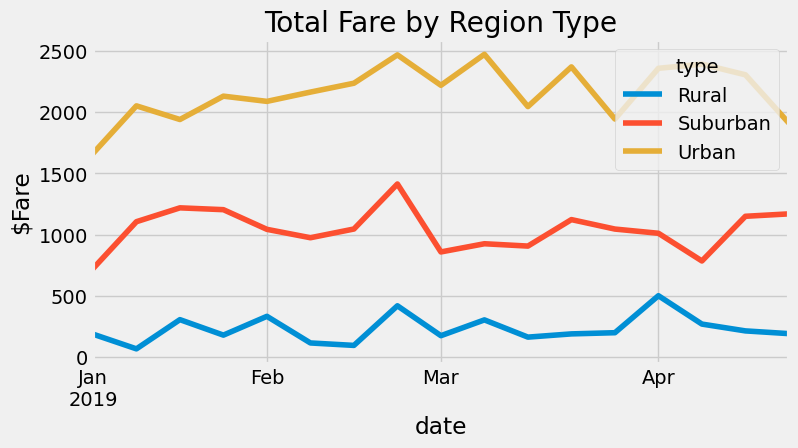

In [97]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
df_date_resample.plot(figsize=(8,4))
plt.ylabel("$Fare")
plt.title("Total Fare by Region Type")
plt.savefig("analysis/PyBer_fare_summary.png",format="png")